# ***Importar lo modulos a usar en el ejercicio***

In [98]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil
import tensorflow as tf
import pathlib
import PIL
import time
import zipfile
import random
import tensorflow as tf 
from tensorflow.keras import layers
#import train_test_split 
from keras.utils import to_categorical 

from keras.models import Sequential 
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Rutas de los datos de entrenamiento y validación

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
MAIN_PATH = "/content/drive/MyDrive/Colabs/DL/Taller 2/train_dataset/train"
TEST_PATH = "/content/drive/MyDrive/Colabs/DL/Taller 2/test_dataset/test"
CLASSES = os.listdir(MAIN_PATH)
NUM_CLASSES = len(CLASSES)

HEIGHT,WIDTH = 32,32
BATCH_SIZE = 32
SPLIT = 0.2

Generación de dataset de entrenamiento, validacion y test

In [101]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=SPLIT)

train_ds = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "training",
    class_mode = "categorical",
    shuffle = True
)

val_ds = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (HEIGHT,WIDTH),
    batch_size = BATCH_SIZE,
    subset = "validation",
    class_mode = "categorical",
    shuffle = True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size = (HEIGHT,WIDTH),
    shuffle = False
)

Found 4823 images belonging to 10 classes.
Found 1201 images belonging to 10 classes.
Found 324 images belonging to 10 classes.


In [102]:
model = keras.Sequential(
    [
        layers.Conv2D(filters=48, kernel_size=(3, 3), activation='relu', padding='same', input_shape=[HEIGHT,WIDTH, 3]),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(10, activation='softmax')
    ]
    )

In [103]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [104]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 96)        41568     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 96)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6144)              0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [105]:
history = model.fit(train_ds, epochs=20,  validation_data=val_ds, batch_size = 200)

Epoch 1/20
151/151 [==============================] - 51s 324ms/step - loss: 0.9036 - accuracy: 0.7236 - val_loss: 0.5611 - val_accuracy: 0.8310
Epoch 2/20
151/151 [==============================] - 53s 349ms/step - loss: 0.4682 - accuracy: 0.8586 - val_loss: 0.4396 - val_accuracy: 0.8768
Epoch 3/20
151/151 [==============================] - 57s 375ms/step - loss: 0.3544 - accuracy: 0.8903 - val_loss: 0.3268 - val_accuracy: 0.9067
Epoch 4/20
151/151 [==============================] - 53s 348ms/step - loss: 0.2757 - accuracy: 0.9169 - val_loss: 0.3172 - val_accuracy: 0.9109
Epoch 5/20
151/151 [==============================] - 46s 306ms/step - loss: 0.2329 - accuracy: 0.9326 - val_loss: 0.3639 - val_accuracy: 0.8918
Epoch 6/20
151/151 [==============================] - 49s 324ms/step - loss: 0.2082 - accuracy: 0.9388 - val_loss: 0.2173 - val_accuracy: 0.9376
Epoch 7/20
151/151 [==============================] - 50s 332ms/step - loss: 0.1804 - accuracy: 0.9467 - val_loss: 0.2036 - val_ac

In [106]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_ds, batch_size=200)
print("test loss, test acc:", results)

Evaluate on test data
11/11 [==============================] - 1s 121ms/step - loss: 0.1982 - accuracy: 0.9568
test loss, test acc: [0.19824513792991638, 0.9567901492118835]


In [ ]:
#find out what metrics you have and what they are called
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epoch')

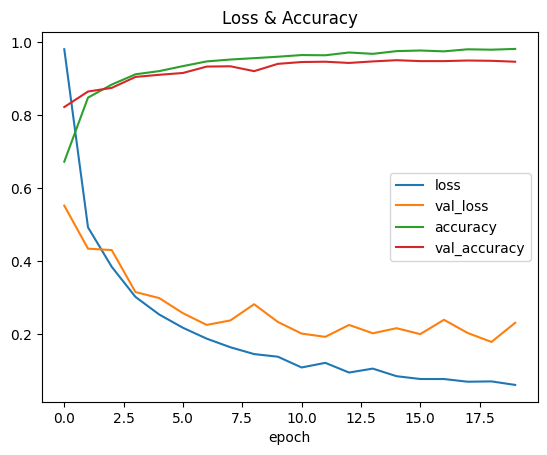

In [ ]:
#Plot metrics of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.title('Loss & Accuracy')
plt.xlabel('epoch')

In [ ]:
print(type(test_ds.filepaths))
print(test_ds.filepaths[300])
print(type(test_ds.labels))
print(test_ds.labels[300])

<class 'list'>
/content/drive/MyDrive/Colabs/DL/Taller 2/test_dataset/test/P1/00188.jpg
<class 'numpy.ndarray'>
6


In [107]:
predictions = model.predict(test_ds)

11/11 [==============================] - 2s 126ms/step


In [108]:
print(predictions[0])

[9.98754323e-01 4.07318727e-11 4.42622786e-06 4.27606075e-08
 6.77422420e-08 1.08121164e-07 8.20804402e-08 1.84069959e-09
 4.80805298e-08 1.24092062e-03]


11/11 [==============================] - 4s 326ms/step
Matriz de Confusión
[[ 60   0   1   1   0   0   0   0   0   0]
 [  0  10   2   0   0   2   0   0   0   0]
 [  1   1 167   0   0   0   0   0   0   0]
 [  1   0   1  10   0   0   0   0   0   0]
 [  0   1   2   0   4   0   1   0   0   0]
 [  0   0   0   0   0  25   0   0   0   0]
 [  0   0   0   0   0   0  14   0   0   0]
 [  0   0   0   0   0   0   0   6   0   0]
 [  0   0   0   0   0   0   0   0   6   0]
 [  0   0   0   0   0   0   0   0   0   8]]


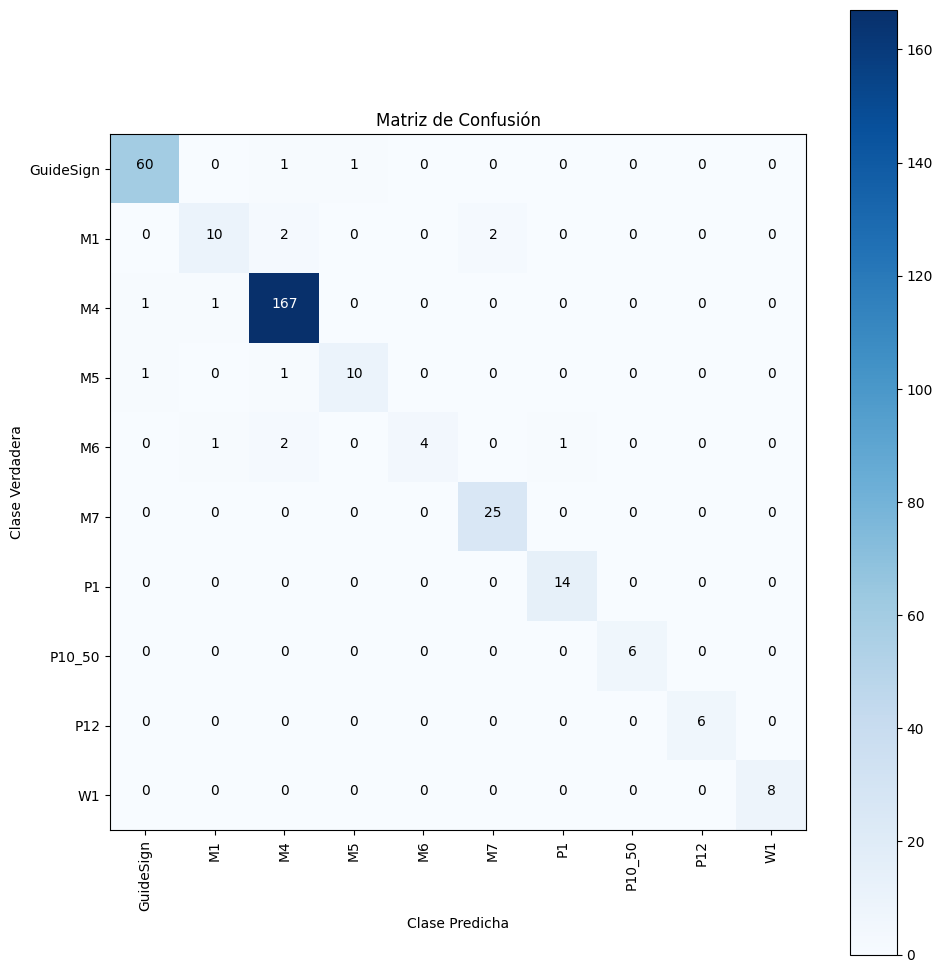

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from itertools import *

# Obtener la predicción de las imágenes de prueba
preds = model.predict(test_ds, verbose=1)
preds_classes = np.argmax(preds, axis=1)

# Obtener las etiquetas verdaderas de las imágenes de prueba
true_classes = test_ds.classes

# Obtener los nombres de las clases
class_names = list(test_ds.class_indices.keys())

# Calcular la matriz de confusión
cm = confusion_matrix(true_classes, preds_classes)

# Imprimir los valores de la matriz de confusión
print("Matriz de Confusión")
print(cm)

# Graficar la matriz de confusión con los valores
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

# Imprimir los valores de la matriz de confusión en la gráfica
thresh = cm.max() / 2.
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
      plt.text(j, i, format(cm[i, j], 'd'),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [113]:
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(test_ds)
y_pred = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas del conjunto de prueba
y_true = test_ds.classes

# Calcular el reporte de clasificación
target_names = list(test_ds.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

11/11 [==============================] - 2s 155ms/step
              precision    recall  f1-score   support

   GuideSign       0.97      0.97      0.97        62
          M1       0.83      0.71      0.77        14
          M4       0.97      0.99      0.98       169
          M5       0.91      0.83      0.87        12
          M6       1.00      0.50      0.67         8
          M7       0.93      1.00      0.96        25
          P1       0.93      1.00      0.97        14
      P10_50       1.00      1.00      1.00         6
         P12       1.00      1.00      1.00         6
          W1       1.00      1.00      1.00         8

    accuracy                           0.96       324
   macro avg       0.95      0.90      0.92       324
weighted avg       0.96      0.96      0.95       324



In [114]:
#Probing the model with random image downloaded from internet
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colabs/DL/Taller 2/Imag_Prueba_Modelo.jpg')
img = img.resize((HEIGHT, WIDTH))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction[0])
class_names = list(train_ds.class_indices.keys())
class_name = class_names[predicted_class]
print("La imagen se clasifica como:", class_name)

1/1 [==============================] - 0s 108ms/step
La imagen se clasifica como: W1
